In [44]:
# import dependencies
# data cleaning and manipulation 
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as lm
import pickle

from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

In [45]:
df = pd.read_csv('fish.csv',index_col=False)
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Text(0.5, 1, 'Correlation Map')

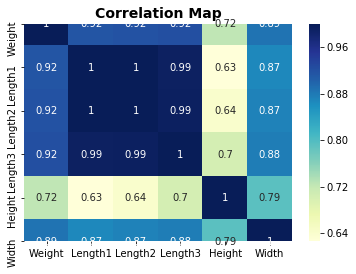

In [46]:
corr = df.corr()
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold",loc="center", fontsize=14)

In [47]:
#Encode the fish species
# encoder = LabelEncoder()
# df['Species'] = encoder.fit_transform(df['Species'])

In [48]:
# Split the data into 70% training and 30% testing
X = df
y = df['Species'].astype('category') #Encode the fish species (astype category works similar to a label encoder.) 
X.drop('Species',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [49]:
logreg = lm.LogisticRegression(random_state = 40,max_iter= 150)

In [50]:
logreg.fit(X_train, y_train)

C:\Users\kashi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kashi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
score = logreg.score(X_test, y_test)
score

0.9583333333333334

In [52]:
pkl_filename = "Fish_Species.pkl"
with open(pkl_filename, 'wb') as to_write:
    pickle.dump(logreg, to_write)

with open(pkl_filename,'rb') as read_file:
    df = pickle.load(read_file)

In [43]:
X.dtypes

Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object